# Laboratorio práctico: Web scraping y extracción de datos usando APIs

El web scraping se utiliza para la extracción de datos relevantes de páginas web. Si necesitas obtener datos de una página web en un dominio público, el web scraping hace que el proceso de extracción de datos sea bastante conveniente. Sin embargo, el uso del web scraping requiere algunos conocimientos básicos sobre la estructura de las páginas <code>HTML</code>. En este laboratorio, aprenderás el proceso de análisis del código <code>HTML</code> de una página web y cómo extraer la información requerida de ella utilizando web scraping en Python.

## Objetivos
Al final de este laboratorio, serás capaz de:

- Utilizar las bibliotecas <code>requests</code> y <code>BeautifulSoup</code> para extraer el contenido de una página web

- Analizar el código <code>HTML</code> de una página web para encontrar la información relevante

- Extraer la información relevante y guardarla en el formato requerido

## Escenario
Considera que has sido contratado por una organización de gestión de Multiplex para extraer la información de las 50 mejores películas con la mejor calificación promedio del enlace web compartido a continuación.


https://web.archive.org/web/20230902185655/https://en.everybodywiki.com/100_Most_Highly-Ranked_Films

La información requerida es <code>Average Rank</code>, <code>Film</code>, y <code>Year</code>.
Se requiere que escribas un script de Python <code>webscraping_movies.py</code> que extraiga la información y la guarde en un archivo <code>CSV</code> llamado <code>top_50_films.csv</code>. También se requiere que guardes la misma información en una base de datos <code>Movies.db</code> bajo el nombre de tabla <code>Top_50</code>.

## Primeros pasos
Necesitas las siguientes bibliotecas para este laboratorio.

1. Biblioteca <code>pandas</code> para el almacenamiento y manipulación de datos.

2. Biblioteca <code>BeautifulSoup</code> para interpretar el documento <code>HTML</code>.

3. Biblioteca <code>requests</code> para comunicarse con la página web.

4. <code>sqlite3</code> para crear la instancia de la base de datos.

Mientras que <code>requests</code> y <code>sqlite3</code> vienen incluidos con Python3, necesitas instalar las bibliotecas <code>pandas</code> y <code>BeautifulSoup</code> en el IDE.

Para esto, ejecuta los siguientes comandos en una ventana de terminal.

```terminal
python3.11 -m pip install pandas
python3.11 -m pip install bs4
```
Ahora, crea un nuevo archivo llamado <code>webscraping_movies.py</code> en la ruta <code>/home/project/</code>.

Escribirás todo tu código en este archivo.

In [ ]:
pip install pandas
pip install bs4

## Configuración del código
Para crear un script de Python, llama a las bibliotecas relevantes y las inicializaciones como primer paso.

### Importando Bibliotecas
Importa las siguientes cuatro bibliotecas agregando las líneas de código indicadas a tu archivo webscraping_movies.py.

In [ ]:
import requests
import sqlite3
import pandas as pd
from bs4 import BeautifulSoup

### Inicialización de entidades conocidas
Debes declarar algunas entidades al principio. Por ejemplo, conoces la <code>URL</code> requerida, el nombre del <code>CSV</code> para guardar el registro, el nombre de la base de datos y el nombre de la tabla para almacenar el registro. También conoces las entidades que se deben guardar. Además, dado que solo necesitas los 50 mejores resultados, necesitarás un contador de bucle inicializado en 0. Puedes inicializar todo esto utilizando el siguiente código en <code>webscraping_movies.py</code>:

In [ ]:
url = 'https://web.archive.org/web/20230902185655/https://en.everybodywiki.com/100_Most_Highly-Ranked_Films'
db_name = 'Movies.db'
table_name = 'Top_50'
csv_path = '/home/project/top_50_films.csv'
df = pd.DataFrame(columns=["Average Rank","Film","Year"])
count = 0


### Cargando la página web para Webscraping
Para acceder a la información requerida de la página web, primero necesitas cargar toda la página web como un documento <code>HTML</code> en python utilizando la función <code>requests.get().text</code> y luego analizar el texto en formato <code>HTML</code> usando <code>BeautifulSoup</code> para permitir la extracción de información relevante.

Agrega el siguiente código a <code>webscraping_movies.py</code>:


In [ ]:
html_page = requests.get(url).text
data = BeautifulSoup(html_page, 'html.parser')

## Analizando el código HTML en busca de información relevante

Abre la página web en un navegador y localiza la tabla requerida desplazándote hacia abajo. Haz clic derecho en la tabla y selecciona <code>Inspeccionar</code> en la parte inferior del menú, como se muestra en la imagen a continuación.

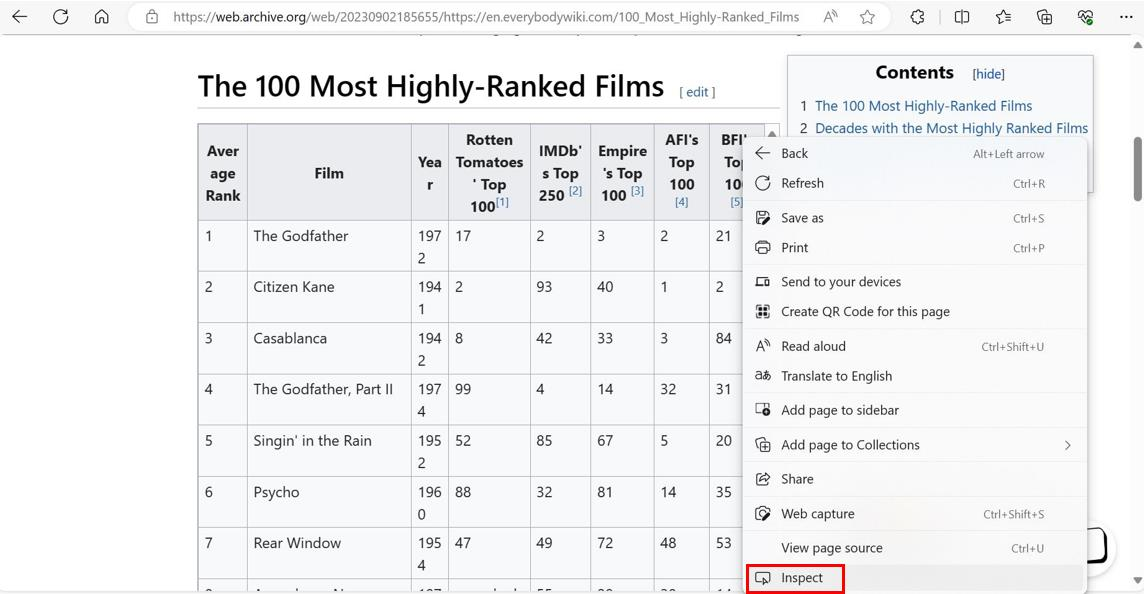

Esto abre el código <code>HTML</code> de la página y te lleva directamente al punto donde comienza la definición de la tabla. Para verificar, coloca el puntero del ratón sobre la etiqueta <code>tbody</code> en el código <code>HTML</code> y observa que la tabla está resaltada en la sección de la página.

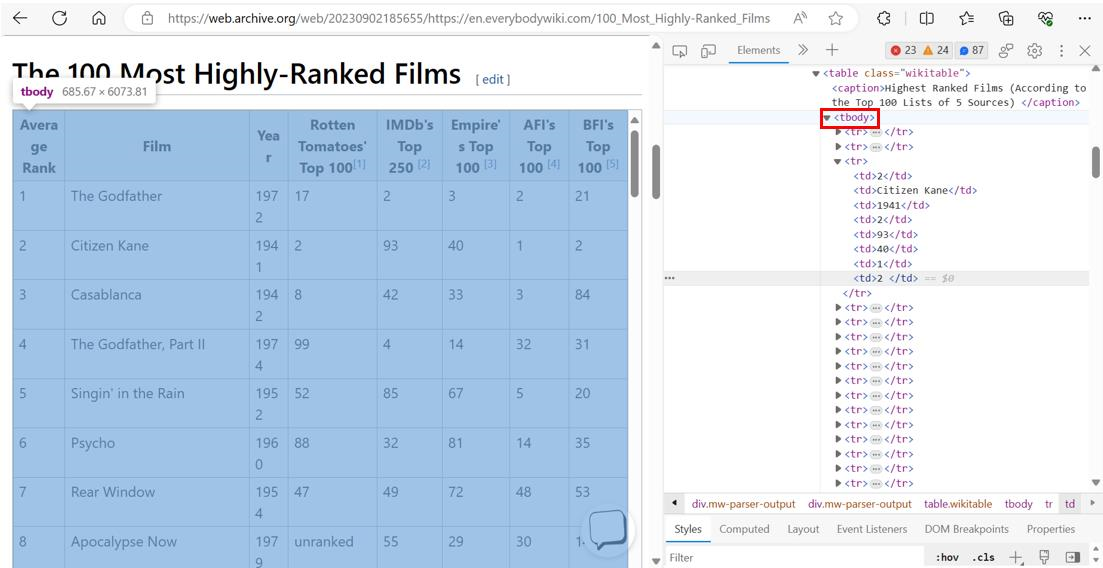

Ten en cuenta que todas las filas debajo de esta tabla se mencionan como objetos <code>tr</code> bajo la tabla. Hacer clic en uno de ellos mostraría que los datos en cada fila se guardan además como objetos <code>td</code>, como se ve en la imagen anterior. Necesitas la información bajo los primeros tres encabezados de estos datos almacenados.

También es importante notar que esta es la primera tabla en la página. Debes identificar la tabla requerida al extraer información.

## Extracción de información requerida
Ahora necesitas escribir el bucle para extraer la información apropiada de la página web. Las filas de la tabla necesarias se pueden acceder utilizando la función <code>find_all()</code> con el objeto <code>BeautifulSoup</code> usando las declaraciones a continuación.

In [ ]:
tables = data.find_all('tbody')
rows = tables[0].find_all('tr')

Aquí, la variable <code>tables</code> obtiene el cuerpo de todas las tablas en la página web y la variable <code>rows</code> obtiene todas las filas de la primera tabla.

Ahora puedes iterar sobre las filas para encontrar los datos requeridos. Usa el código que se muestra a continuación para extraer la información.

In [ ]:
for row in rows:
    if count<50:
        col = row.find_all('td')
        if len(col)!=0:
            data_dict = {"Average Rank": col[0].contents[0],
                         "Film": col[1].contents[0],
                         "Year": col[2].contents[0]}
            df1 = pd.DataFrame(data_dict, index=[0])
            df = pd.concat([df,df1], ignore_index=True)
            count+=1
    else:
        break

El código funciona de la siguiente manera.

1. Iterar sobre el contenido de la variable <code>rows</code>.
2. Verificar el contador del bucle para restringir a 50 entradas.
3. Extraer todos los objetos de datos <code>td</code> en la fila y guardarlos en <code>col</code>.
4. Verificar si la longitud de <code>col</code> es 0, es decir, si no hay datos en la fila actual. Esto es importante ya que, muchas veces, hay filas combinadas que no son evidentes en la apariencia de la página web.
5. Crear un diccionario <code>data_dict</code> con las claves iguales a las columnas del dataframe creado para registrar la salida anteriormente y los valores correspondientes de los primeros tres encabezados de datos.
6. Convertir el diccionario a un dataframe y concatenarlo con el existente. De esta manera, los datos se siguen añadiendo al dataframe con cada iteración del bucle.
7. Incrementar el contador del bucle.
8. Una vez que el contador alcanza 50, detener la iteración sobre las filas y romper el bucle.

Imprimir el contenido del dataframe utilizando lo siguiente:

In [ ]:
print(df)

## Almacenando los datos
Después de que se ha creado el dataframe, puedes guardarlo en un archivo CSV usando el siguiente comando:

In [ ]:
df.to_csv(csv_path)

Recuerda que definiste la variable <code>csv_path</code> anteriormente.

Para almacenar los datos requeridos en una base de datos, primero necesitas inicializar una conexión a la base de datos, guardar el dataframe como una tabla y luego cerrar la conexión. Esto se puede hacer utilizando el siguiente código:

In [ ]:
conn = sqlite3.connect(db_name)
df.to_sql(table_name, conn, if_exists='replace', index=False)
conn.close()

Esta base de datos ahora se puede utilizar para recuperar la información relevante mediante consultas SQL. Aprenderás cómo hacerlo más adelante en el curso.

## Ejecutar el código
Ejecuta el código usando la instrucción a continuación en una ventana de terminal. Asegúrate de que el directorio actual sea <code>/home/project/</code>.

```terminal
python3.11 webscraping_movies.py
```

Puedes esperar que la salida se vea como se muestra a continuación.
Ten en cuenta que los archivos CSV y DB también se crean en la carpeta del proyecto.

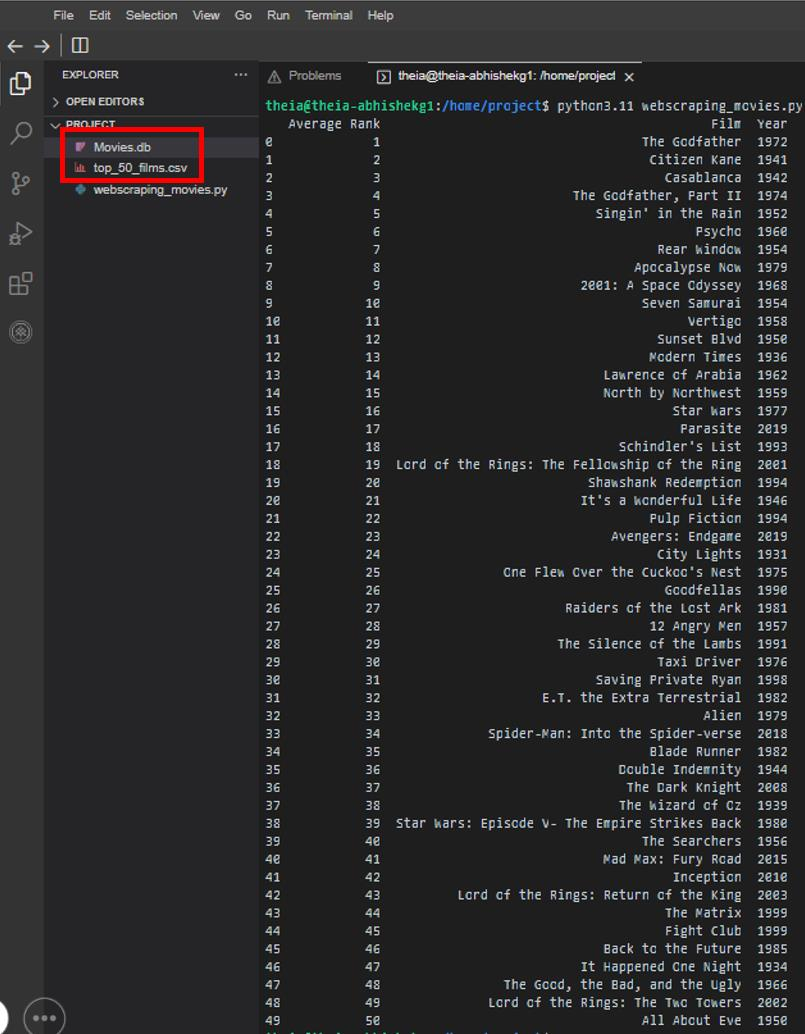

**Nota Importante**:

>Para mantener la consistencia de la estructura del laboratorio, la página web a la que accedes se enruta a través de una base de datos de archivo. A menudo, en caso de que el servidor de archivo esté ocupado, los usuarios pueden encontrar una ejecución retrasada y/o un error como:

<code>requests.exceptions.ConnectionError: HTTPSConnectionPool(host='web.archive.org', port=443): Max retries exceeded with url</code>.
En tal situación, intenta ejecutar el código nuevamente. Si el problema persiste, puedes cambiar la URL a la versión en vivo, como:

<code>https://en.everybodywiki.com/100_Most_Highly-Ranked_Films</code>

## Solución del laboratorio
En caso de que no puedas obtener la salida requerida del código o estés enfrentando algunos errores, el archivo final para <code>webscraping_movies.py</code> se comparte a continuación. Ten en cuenta que esto es para tu ayuda, y te animamos a que primero intentes resolver los errores por tu cuenta.

<details><summary>Click here for the solution</summary>

```python
import requests
import sqlite3
import pandas as pd
from bs4 import BeautifulSoup

url = 'https://web.archive.org/web/20230902185655/https://en.everybodywiki.com/100_Most_Highly-Ranked_Films'
db_name = 'Movies.db'
table_name = 'Top_50'
csv_path = 'top_50_films.csv'
df = pd.DataFrame(columns=["Average Rank","Film","Year"])
count = 0

html_page = requests.get(url).text
data = BeautifulSoup(html_page, 'html.parser')

tables = data.find_all('tbody')
rows = tables[0].find_all('tr')

for row in rows:
    if count < 50 :
        col = row.find_all('td')
        if len(col)!=0:
            data_dict = {"Average Rank": int(col[0].contents[0]),
                         "Film": str(col[1].contents[0]),
                         "Year": int(col[2].contents[0])}
            df1 = pd.DataFrame(data_dict, index=[0])
            df = pd.concat([df,df1], ignore_index=True)
            count+=1
    else:
        break

print(df)

df.to_csv(csv_path)

conn = sqlite3.connect(db_name)
df.to_sql(table_name, conn, if_exists='replace', index=False)
conn.close()
```
</details>

## Problemas de práctica
Intenta los siguientes problemas de práctica para poner a prueba tu comprensión del laboratorio. Ten en cuenta que las soluciones de lo siguiente no se comparten. Se te anima a utilizar los foros de discusión en caso de que necesites ayuda.

1. Modifica el código para extraer los encabezados <code>Film</code>, <code>Year</code> y <code>Rotten Tomatoes' Top 100</code>.

2. Restringe los resultados solo a las 25 entradas principales.

3. Filtra la salida para imprimir solo las películas estrenadas en los años 2000 (año 2000 incluido).

## Conclusión
En este laboratorio, aprendiste cómo:

1. Analizar páginas HTML para la posición de datos relevantes.

2. Usar las bibliotecas BeautifulSoup, requests y pandas para extraer la información necesaria de la web.

3. Almacenar los datos extraídos como un archivo CSV y en una base de datos SQL.